In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
exam_df = pd.read_csv('dataset/exams.csv')

In [3]:
exam_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
y = exam_df['math score']

In [5]:
features = ['reading score', 'writing score']

In [6]:
X = exam_df[features]

In [7]:
X.head()

,reading score,writing score
0,67,63
1,59,55
2,60,50
3,78,68
4,73,68


In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=400)

In [9]:
mat_model = RandomForestRegressor(random_state=1)
mat_model.fit(train_X, train_y)
mat_model_predictions = mat_model.predict(val_X)

In [10]:
mat_model_mae = mean_absolute_error(mat_model_predictions, val_y)

In [11]:
mat_model_mae

7.884305662962641

In [12]:
mat_model_test = mat_model.predict(X)
exam_df['PredMat'] = mat_model_test.round()

In [13]:
exam_df.describe()

,math score,reading score,writing score,PredMat
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,66.339000
std,15.402871,14.737272,15.600985,13.891618
min,13.000000,27.000000,23.000000,24.000000
25%,56.000000,60.000000,58.000000,57.000000
50%,66.500000,70.000000,68.000000,66.000000
75%,77.000000,79.000000,79.000000,76.250000
max,100.000000,100.000000,100.000000,96.000000


In [14]:
mat_vs_pred = pd.DataFrame(exam_df['math score'])

In [15]:
mat_vs_pred['predicted'] = mat_model_test

In [16]:
mat_vs_pred['predicted'] = round(mat_vs_pred['predicted'], 0)

In [17]:
mat_vs_pred

,math score,predicted
0,67,58.0
1,40,58.0
2,59,58.0
3,77,75.0
4,78,72.0
...,...,...
995,73,63.0
996,85,87.0
997,32,35.0
998,73,75.0


In [18]:
mat_vs_pred['diff'] = mat_vs_pred['math score'] - mat_vs_pred['predicted']

In [19]:
mat_vs_pred

,math score,predicted,diff
0,67,58.0,9.0
1,40,58.0,-18.0
2,59,58.0,1.0
3,77,75.0,2.0
4,78,72.0,6.0
...,...,...,...
995,73,63.0,10.0
996,85,87.0,-2.0
997,32,35.0,-3.0
998,73,75.0,-2.0


In [20]:
actual_predic_mat_vs_pred = pd.DataFrame(mat_vs_pred['math score'])
actual_predic_mat_vs_pred

,math score
0,67
1,40
2,59
3,77
4,78
...,...
995,73
996,85
997,32
998,73


In [21]:
actual_predic_mat_vs_pred['predicted'] = mat_vs_pred['predicted']
actual_predic_mat_vs_pred

,math score,predicted
0,67,58.0
1,40,58.0
2,59,58.0
3,77,75.0
4,78,72.0
...,...,...
995,73,63.0
996,85,87.0
997,32,35.0
998,73,75.0


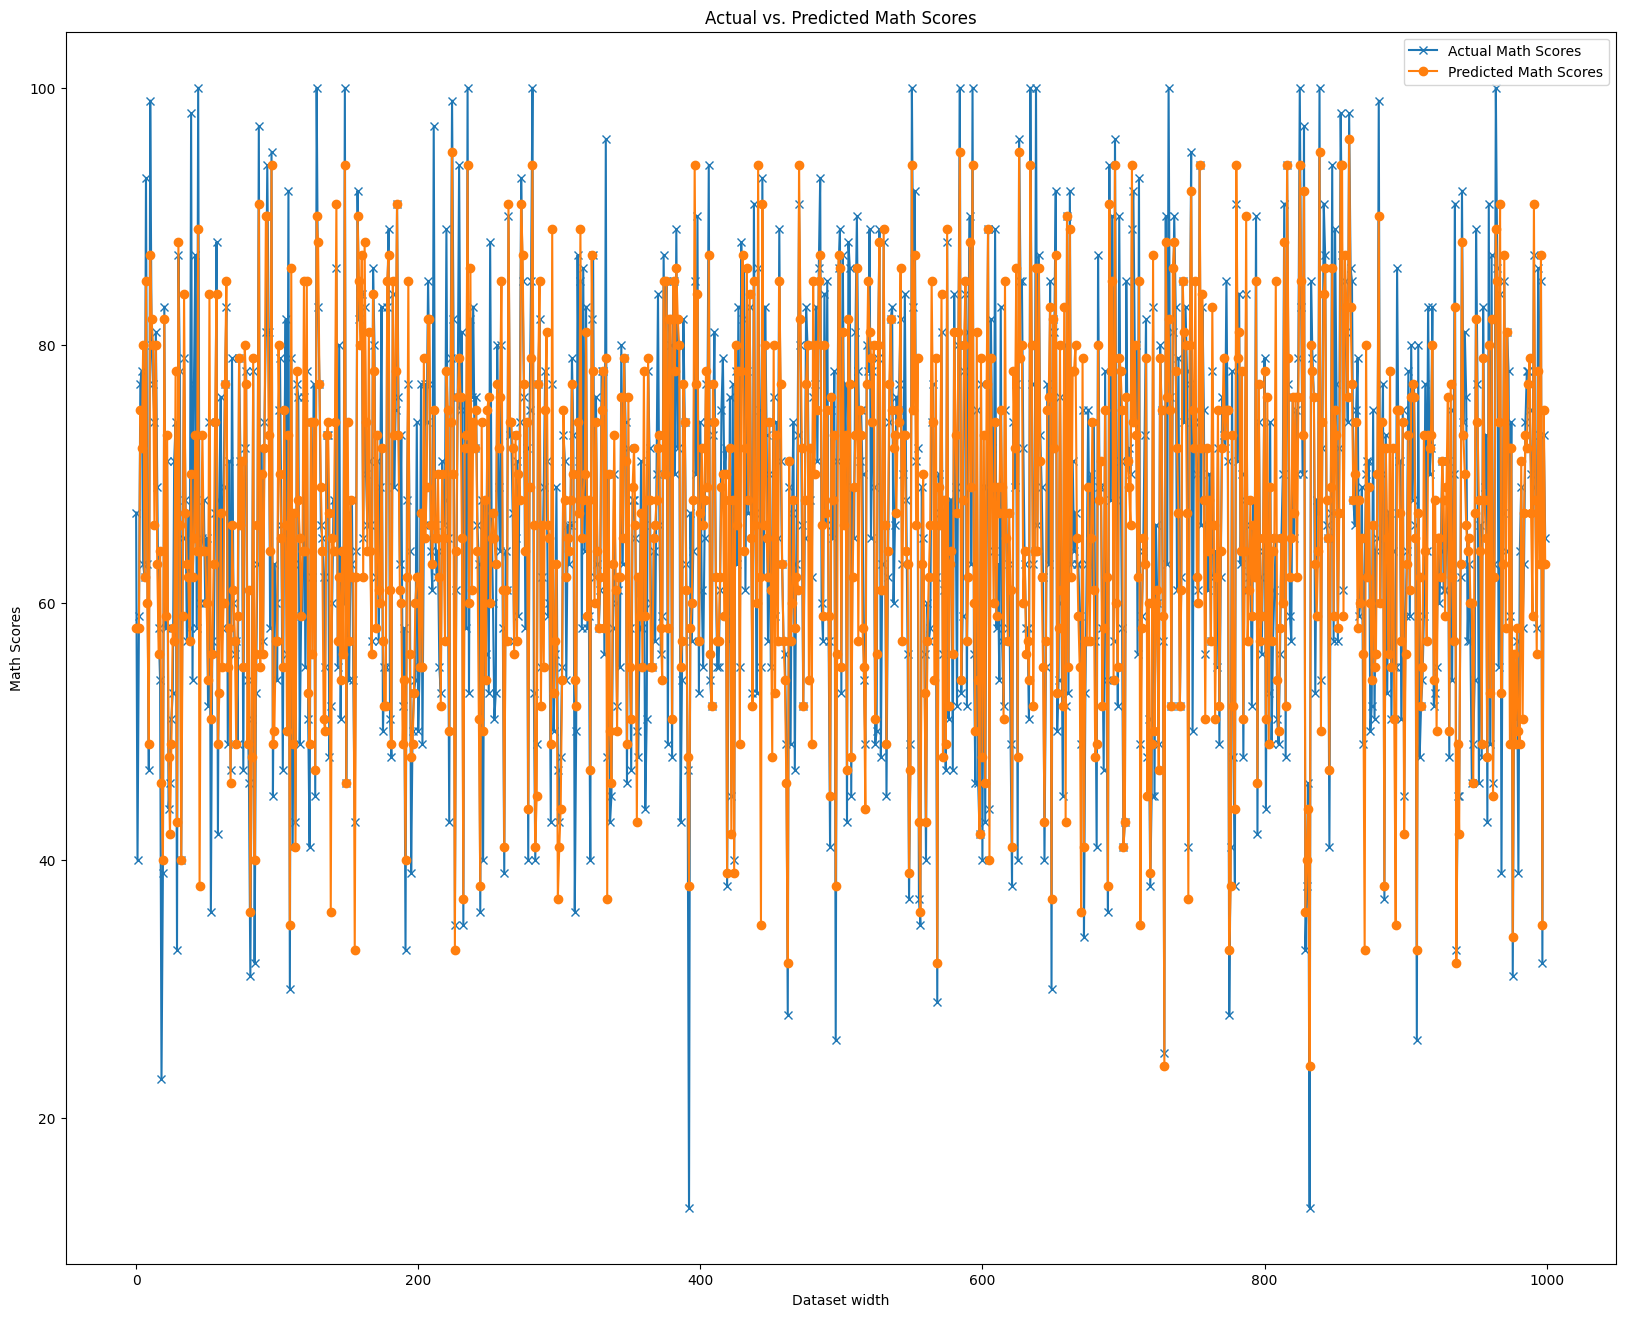

In [22]:
plt.figure(figsize=(20, 16))
plt.plot(actual_predic_mat_vs_pred['math score'], label='Actual Math Scores', marker='x'); plt.plot(actual_predic_mat_vs_pred['predicted'], label='Predicted Math Scores', marker='o')
plt.xlabel('Dataset width'); plt.ylabel('Math Scores'); plt.title('Actual vs. Predicted Math Scores')
plt.legend(); plt.show()
